<a href="https://colab.research.google.com/github/sanjeekan/fruit_detection-classification/blob/main/fruit_detection_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 43.8 MB/s eta 0:00:00



0: 512x640 1 bowl, 1 banana, 4 apples, 2 oranges, 1 dining table, 189.2ms
Speed: 6.4ms preprocess, 189.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


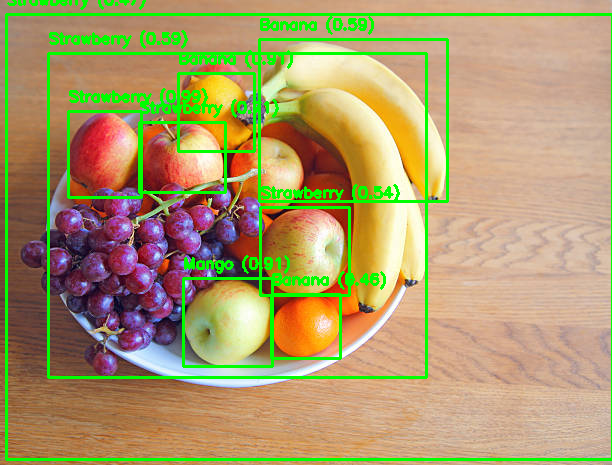

In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

yolo_model = YOLO("yolov8n.pt")
cnn_model = load_model("/content/drive/MyDrive/fruit_detection_model.h5")
class_labels = ["Apple", "Banana", "Grape", "Mango", "Strawberry"]

def preprocess_image(image, target_size = (224, 224)):
  image = cv2.resize(image, target_size)
  image = image / 255.0
  image = np.expand_dims(image, axis = 0)
  return image

def detect_and_classify(image_path):
  image = cv2.imread(image_path)
  original_image = image.copy()
  results = yolo_model(image)

  detections = results[0].boxes.xyxy.cpu().numpy()
  confidences = results[0].boxes.conf.cpu().numpy()
  class_ids = results[0].boxes.cls.cpu().numpy()

  for i, box in enumerate(detections):
    x1, y1, x2, y2 = map(int, box)
    confidence = confidences[i]
    cropped_image = image[y1:y2, x1:x2]
    preprocessed_image = preprocess_image(cropped_image)
    predictions = cnn_model.predict(preprocessed_image)
    predicted_class = class_labels[np.argmax(predictions)]
    confidence_score = np.max(predictions)

    cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label = f"{predicted_class} ({confidence_score:.2f})"
    cv2.putText(original_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

  cv2_imshow(original_image)

image_path = "/content/drive/MyDrive/image.jpg"
detect_and_classify(image_path)
